# Image Classifier for Dogs and Cats

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

plt.rcParams['figure.figsize'] = 15, 8

In [2]:
from keras import Input, Model
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from keras import optimizers, losses, metrics
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

Using TensorFlow backend.


In [3]:
DATADIR = '/Volumes/Study/GitHub/data/cats-dogs/'
LOGDIR = '/Volumes/Study/GitHub/neural-nets/graphs/cats-dogs/'

In [4]:
train_dir = os.path.join(DATADIR + 'training/')
validation_dir = os.path.join(DATADIR + 'validation/')
test_dir = os.path.join(DATADIR + 'test/')

In [5]:
print(train_dir)
print(validation_dir)
print(test_dir)

/Volumes/Study/GitHub/data/cats-dogs/training/
/Volumes/Study/GitHub/data/cats-dogs/validation/
/Volumes/Study/GitHub/data/cats-dogs/test/


In [28]:
ip = Input(batch_shape=(None, 150, 150, 3), name='input')

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', name='conv1')(ip)
x = MaxPool2D(pool_size=(2, 2), name='pool1')(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='conv2')(x)
x = MaxPool2D(pool_size=(2, 2), name='pool2')(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', name='conv3')(x)
x = MaxPool2D(pool_size=(2, 2), name='pool3')(x)

x = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', name='conv4')(x)
x = MaxPool2D(pool_size=(2, 2), name='pool4')(x)

x = Flatten(name='flatten')(x)
x = Dropout(rate=0.3, name='dropout1')(x)

x = Dense(units=128, activation='relu', name='dense1')(x)
x = Dropout(rate=0.3, name='dropout2')(x)

output = Dense(units=1, activation='sigmoid', name='output')(x)

model = Model(inputs=ip, outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 150, 150, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 150, 150, 32)      896       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 75, 75, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 37, 37, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 37, 37, 128)       73856     
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 18, 18, 128)       0         
__________

In [29]:
loss = losses.binary_crossentropy
opt = optimizers.Adam(lr=1e-5)
metric = metrics.binary_accuracy

In [30]:
model.compile(loss=loss, optimizer=opt, metrics=[metric])

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    classes=['cats', 'dogs'],
                    batch_size=20, 
                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [33]:
validiation_generator = train_datagen.flow_from_directory(
                            validation_dir,
                            target_size=(150, 150),
                            classes=['cats', 'dogs'],
                            batch_size=20, 
                            class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=20,
                             validation_data=validiation_generator,
                             validation_steps=50)

model.save(os.path.join(LOGDIR + 'cat_dog_v1_1.h5'))

Epoch 1/20
100/100 [==============================] - 92s 915ms/step - loss: 0.6934 - binary_accuracy: 0.4980 - val_loss: 0.6921 - val_binary_accuracy: 0.5010
Epoch 2/20
100/100 [==============================] - 90s 903ms/step - loss: 0.6932 - binary_accuracy: 0.5050 - val_loss: 0.6905 - val_binary_accuracy: 0.5820
Epoch 3/20
100/100 [==============================] - 96s 959ms/step - loss: 0.6890 - binary_accuracy: 0.5440 - val_loss: 0.6875 - val_binary_accuracy: 0.5840
Epoch 4/20
100/100 [==============================] - 92s 919ms/step - loss: 0.6866 - binary_accuracy: 0.5500 - val_loss: 0.6850 - val_binary_accuracy: 0.5330
Epoch 5/20
100/100 [==============================] - 90s 899ms/step - loss: 0.6784 - binary_accuracy: 0.5905 - val_loss: 0.6803 - val_binary_accuracy: 0.5540
Epoch 6/20
100/100 [==============================] - 90s 898ms/step - loss: 0.6752 - binary_accuracy: 0.5950 - val_loss: 0.6740 - val_binary_accuracy: 0.6060
Epoch 7/20
100/100 [==========================

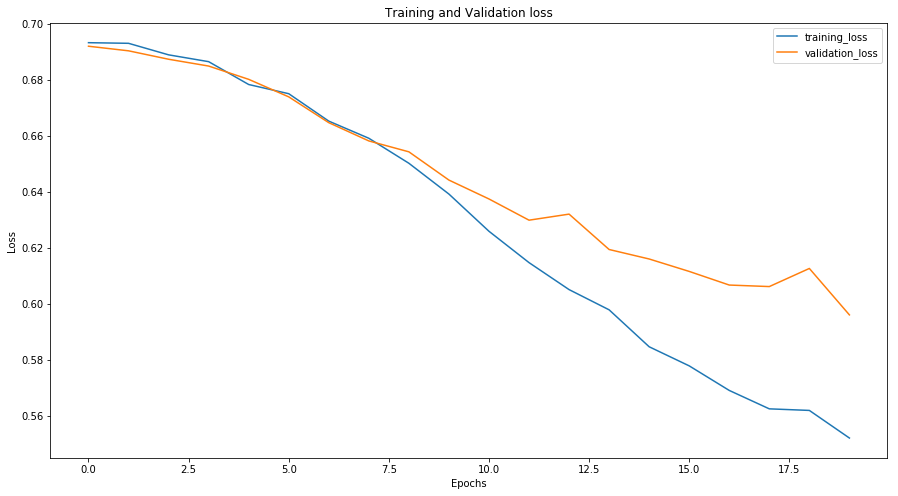

In [35]:
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

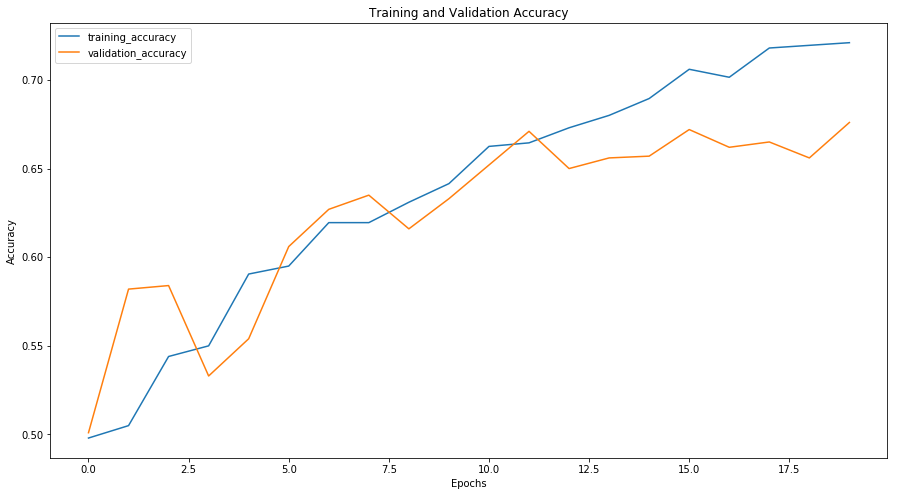

In [36]:
plt.plot(history.history['binary_accuracy'], label = 'training_accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()